In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from fbm import utils
from fbm.sim import davies_harte

$$\sigma_t = \exp \left\{ \nu dW^{H}_t - \alpha(X_t - m)dt \right\} ,\; t\in [0, T]$$

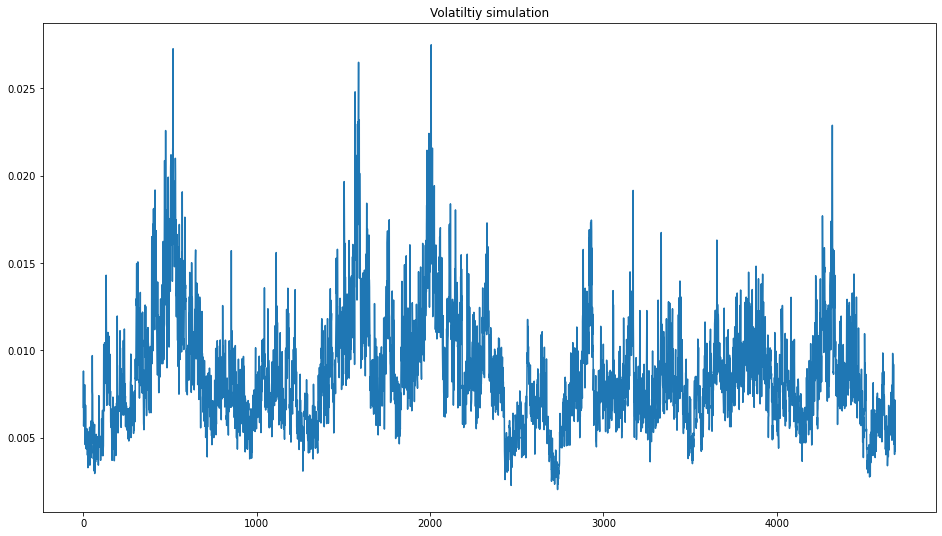

In [40]:
H = 0.14
v = 0.3
X0 = m = -5
alpha = 5e-4
T = 4683

fBm = davies_harte.DaviesHarteFBmGenerator()
fBm_path = fBm.generate_fGn(H, T)
X = np.ndarray(T)
X[0] = X0
for i in range(1, len(X)):
    X[i] = X[i-1] + v*fBm_path[i-1] - alpha * (X[i-1] - m)

plt.figure(figsize=(16,9))
plt.title('Volatiltiy simulation')
plt.plot(np.arange(T), np.exp(X))
plt.show()

In [32]:
import pandas as pd
import datetime as dt

df = pd.read_csv('../../data/OxfordManRealizedVolatilityIndices.csv', index_col=0, header=2)
rv1 = pd.DataFrame(index=df.index)
for col in df.columns:
    if col[-3:] == '.rv':
        rv1[col] = df[col]
rv1.index = [dt.datetime.strptime(str(date), "%Y%m%d") for date in rv1.index.values]

             SPX2.rv  simulate
2000-01-03  0.012540  0.006738
2000-01-04  0.017267  0.008814
2000-01-05  0.017528  0.005663
2000-01-06  0.011672  0.006251
2000-01-07  0.009629  0.007308
...              ...       ...
2017-11-29  0.004001  0.005702
2017-11-30  0.005257  0.005156
2017-12-01  0.009395  0.004042
2017-12-04  0.004782  0.007162
2017-12-05       NaN  0.004225

[4683 rows x 2 columns]


<AxesSubplot:title={'center':'S&P 500 realized volatility and volatility simulation'}>

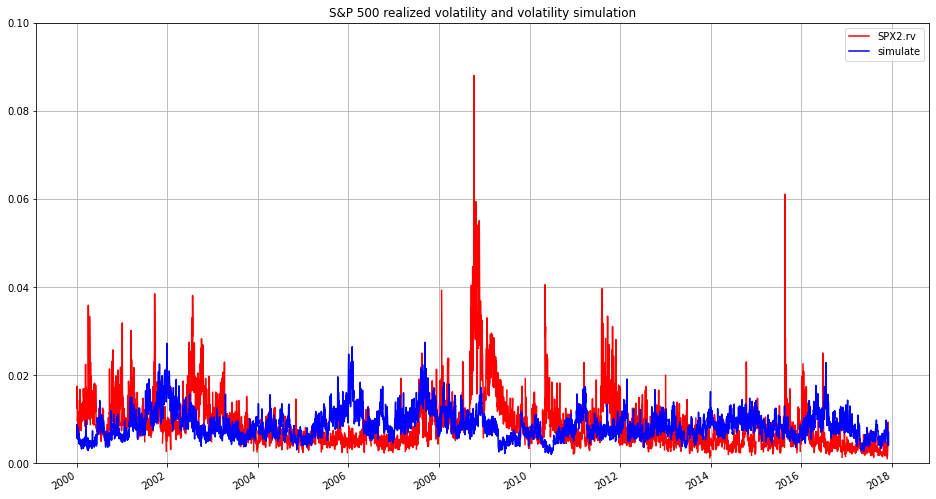

In [41]:
spx = pd.DataFrame(np.sqrt(rv1['SPX2.rv']))
spx['simulate'] = np.exp(X)
print(spx)
spx.plot(color=['red', 'blue'], grid=True, title='S&P 500 realized volatility and volatility simulation',
         figsize=(16, 9), ylim=(0,0.1))

In [24]:
pd.DataFrame(np.sqrt(rv1['SPX2.rk']))

,SPX2.rk
2000-01-03,0.012678
2000-01-04,0.016260
2000-01-05,0.017454
2000-01-06,0.012189
2000-01-07,0.011103
...,...
2017-11-29,0.004118
2017-11-30,0.004526
2017-12-01,0.011407
2017-12-04,0.004802


$$\frac{dS_t}{S_t} = \mu_tdt + \sigma_tdZ_t$$
$$\sigma_t = \exp \left\{ X_t \right\} ,\; t\in [0, T]$$
$$dX_t =  \nu dW^{H}_t - \alpha(X_t - m)dt$$
- $Z$ and $W^{H}$ are correlated ($corr(Z_{1}, W^{H}_{1}) = \rho$)

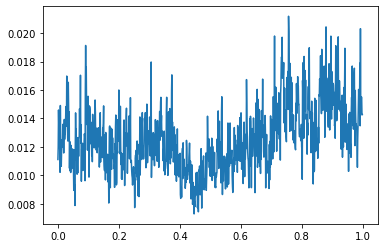

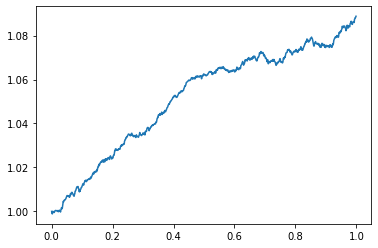

In [31]:
H = 0.1
v = 0.3
X0 = m = -4.5
mu = 0.08
S0 = 1
alpha = 5e-4
T = 1
spacing = 1000
rho = -0.6

bfBm = davies_harte.DaviesHarteBiFBmGenerator()
bfBm_paths = bfBm.generate_bifGn(H1=H, H2=0.5, rho=rho, size=T*spacing)

dwh = bfBm_paths[0] / spacing**H
dz = bfBm_paths[1] / spacing**0.5

S = np.ndarray(T*spacing)
X = np.ndarray(T*spacing)
S[0] = S0
X[0] = X0

for i in range(1, len(X)):
    X[i] = X[i-1] + v*dwh[i-1] - alpha * (X[i-1] - m) / spacing
    sigma = np.exp(X[i-1])
    S[i] = S[i-1] * mu / spacing + S[i-1] * sigma * dz[i-1] + S[i-1]

plt.plot(np.arange(T*spacing)/spacing, np.exp(X))
plt.show()

plt.plot(np.arange(T*spacing)/spacing, S)
plt.show()